# 1. Download Data

## 1.1 Advertising Dataset

In [ ]:
!gdown --id 1yXzDN5MK6qAGaVh_Nu5gwG2d1HyDunzd

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yXzDN5MK6qAGaVh_Nu5gwG2d1HyDunzd
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 7.49MB/s]


## 1.2 Image a

In [ ]:
!gdown --id 1z__y_hiKgLV1zg9HVG3my6sMyqn_15z8

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1z__y_hiKgLV1zg9HVG3my6sMyqn_15z8
To: /content/a.jpg
100% 34.4k/34.4k [00:00<00:00, 45.2MB/s]


## Nearest-neighbor interpolation

### Gray Image 

In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

def resize_nearest_neighbor_interpolation_gray(image, new_h, new_w):
    old_h, old_w = image.shape[:2]
    new_image = np.zeros((new_h, new_w))
    
    #Calculate horizontal and vertical scaling factor
    w_scale_factor = old_w/new_w
    h_scale_factor = old_h/new_h
        
    for i in range(new_h):
        for j in range(new_w):
            y = math.floor(i*h_scale_factor)
            x = math.floor(j*w_scale_factor)
            new_image[i,j] = image[y,x]
    return new_image.astype(np.uint8)

In [ ]:
image = np.arange(0,9).reshape(3,3).astype(np.uint8)
print(image)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [ ]:
new_image = resize_nearest_neighbor_interpolation_gray(image=image, new_h=6, new_w=6)
print(new_image)

[[0 0 1 1 2 2]
 [0 0 1 1 2 2]
 [3 3 4 4 5 5]
 [3 3 4 4 5 5]
 [6 6 7 7 8 8]
 [6 6 7 7 8 8]]


In [ ]:
resized = cv2.resize(image, (6,6), interpolation=cv2.INTER_NEAREST)
resized

array([[0, 0, 1, 1, 2, 2],
       [0, 0, 1, 1, 2, 2],
       [3, 3, 4, 4, 5, 5],
       [3, 3, 4, 4, 5, 5],
       [6, 6, 7, 7, 8, 8],
       [6, 6, 7, 7, 8, 8]], dtype=uint8)

In [ ]:
image = cv2.imread("/content/a.jpg", 0)
new_image = resize_nearest_neighbor_interpolation_gray(image, image.shape[0]*2, image.shape[1]*2)
cv2.imwrite('a_resize_nearest_neighbor_interpolation.jpg',new_image)

True

In [ ]:
image.shape

(400, 300)

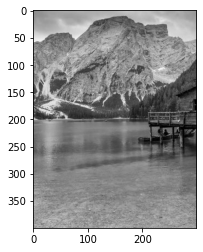

In [ ]:
  plt.imshow(image, cmap='gray')

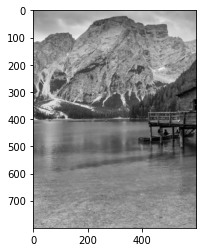

In [ ]:
plt.imshow(new_image, cmap='gray')

In [ ]:
new_image.shape

(800, 600)

### Color Image


In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

def resize_nearest_neighbor_interpolation_color(image, new_h, new_w):
    old_h, old_w, channel = image.shape[:3]
    new_image = np.zeros((new_h, new_w, channel))
    
    #Calculate horizontal and vertical scaling factor
    w_scale_factor = old_w/new_w 
    h_scale_factor = old_h/new_h
    for c in range(channel):
        for i in range(new_h):
            for j in range(new_w):
                y = math.floor(i*h_scale_factor)
                x = math.floor(j*w_scale_factor)
                new_image[i,j,c] = image[y,x,c]
    return new_image.astype(np.uint8)

In [ ]:
image = cv2.imread("/content/a.jpg")
new_image = resize_nearest_neighbor_interpolation_color(image, image.shape[0]*2, image.shape[1]*2)
cv2.imwrite('a_resize_nearest_neighbor_interpolation_color.jpg',new_image)

True

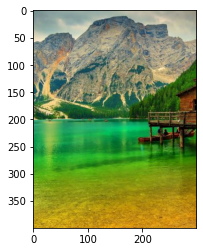

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

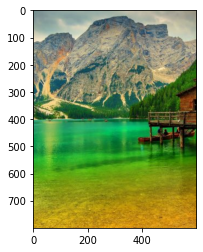

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

## Bilinear Interpolation

### Gray Image

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def bilinear_interpolation(coors, P, f):
    x1, y1, x2, y2 = coors    
    x, y = P
    
    f_Q12 = f[y2, x1]
    f_Q22 = f[y2, x2]
    f_Q11 = f[y1, x1]
    f_Q21 = f[y1, x2]

    f_R1 = f_Q11*(x2-x)/(x2-x1) + f_Q21*(x-x1)/(x2-x1)
    f_R2 = f_Q12*(x2-x)/(x2-x1) + f_Q22*(x-x1)/(x2-x1)
    f_P = f_R1*(y2-y)/(y2-y1) + f_R2*(y-y1)/(y2-y1)
   
    return f_P


def resize_bilinear_interpolation_gray(image, new_h, new_w):
    old_h, old_w = image.shape[:2]
    new_image = np.zeros((new_h, new_w))
    
    #Calculate horizontal and vertical scaling factor
    w_scale_factor = old_w/new_w 
    h_scale_factor = old_h/new_h

    for i in range(new_h):
        for j in range(new_w):
    
            #map the coordinates back to the original image
            y = i * h_scale_factor
            x = j * w_scale_factor
    
            #calculate the coordinate values for 4 surrounding pixels.
            x1 = math.floor(x)
            x2 = min(old_w - 1, math.ceil(x))
            y2 = math.floor(y)
            y1 = min(old_h - 1, math.ceil(y))
            
            if (x2 == x1) and (y1 == y2):
                f_P = image[int(y), int(x)]
            # (vertical) linear interpolation 
            elif (x2 == x1):
                f_R1 = image[int(y1), int(x)]
                f_R2 = image[int(y2), int(x)]
                f_P = f_R1*(y2-y)/(y2-y1) + f_R2*(y-y1)/(y2-y1)
            
            # (horizontal) linear interpolation 
            elif (y1 == y2):
                f_RX1 = image[int(y), int(x1)]
                f_RX2 = image[int(y), int(x2)]
                f_P = f_RX1*(x2-x)/(x2-x1) + f_RX2*(x-x1)/(x2-x1)
            else:
                coors = [x1, y1, x2, y2]
                P = [x, y]
                f_P = bilinear_interpolation(coors, P, image)

            new_image[i,j] = f_P
    return new_image.astype(np.uint8)

In [ ]:
image = np.arange(0,9).reshape(3,3).astype(np.uint8)
image

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=uint8)

In [ ]:
new_image = resize_bilinear_interpolation_gray(image=image, new_h=6, new_w=6)
print(new_image)

[[0 0 1 1 2 2]
 [1 2 2 3 3 3]
 [3 3 4 4 5 5]
 [4 5 5 6 6 6]
 [6 6 7 7 8 8]
 [6 6 7 7 8 8]]


In [ ]:
resize_bilinear_interpolation_gray(image, 6,6)

array([[0, 0, 1, 1, 2, 2],
       [1, 2, 2, 3, 3, 3],
       [3, 3, 4, 4, 5, 5],
       [4, 5, 5, 6, 6, 6],
       [6, 6, 7, 7, 8, 8],
       [6, 6, 7, 7, 8, 8]], dtype=uint8)

In [ ]:
image = cv2.imread("/content/a.jpg", 0)
new_image = resize_bilinear_interpolation_gray(image, image.shape[0]*2, image.shape[1]*2)
cv2.imwrite('b_resize_bilinear_interpolation.jpg',new_image)

True

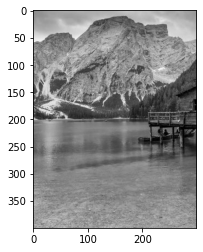

In [ ]:
plt.imshow(image, cmap='gray')

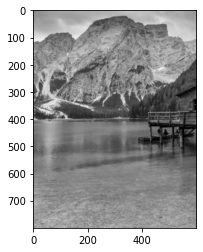

In [ ]:
plt.imshow(new_image, cmap='gray')

### Color Image

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def bilinear_interpolation(coors, P, f, c):
    x1, y1, x2, y2 = coors    
    x, y = P
    
    f_Q12 = f[y2, x1, c]
    f_Q22 = f[y2, x2, c]
    f_Q11 = f[y1, x1, c]
    f_Q21 = f[y1, x2, c]

    f_R1 = f_Q11*(x2-x) + f_Q21*(x-x1)
    f_R2 = f_Q12*(x2-x) + f_Q22*(x-x1)
    f_P = f_R1*(y2-y)/(y2-y1) + f_R2*(y-y1)/(y2-y1)
   
    return f_P


def resize_bilinear_interpolation_color(image, new_h, new_w):
    old_h, old_w, channel = image.shape[:3]
    new_image = np.zeros((new_h, new_w, channel))
    
    #Calculate horizontal and vertical scaling factor
    w_scale_factor = old_w/new_w 
    h_scale_factor = old_h/new_h

    for c in range(channel):
        for i in range(new_h):
            for j in range(new_w):

                #map the coordinates back to the original image
                y = i * h_scale_factor
                x = j * w_scale_factor

                #calculate the coordinate values for 4 surrounding pixels.
                x1 = math.floor(x)
                x2 = min(old_w - 1, math.ceil(x))
                y2 = math.floor(y)
                y1 = min(old_h - 1, math.ceil(y))

                if (x2 == x1) and (y1 == y2):
                    f_P = image[int(y), int(x), c]
                # (vertical) linear interpolation 
                elif (x2 == x1):
                    f_R1 = image[int(y1), int(x), c]
                    f_R2 = image[int(y2), int(x), c]
                    f_P = f_R1*(y2-y)/(y2-y1) + f_R2*(y-y1)/(y2-y1)

                # (horizontal) linear interpolation 
                elif (y1 == y2):
                    f_RX1 = image[int(y), int(x1), c]
                    f_RX2 = image[int(y), int(x2), c]
                    f_P = f_RX1*(x2-x)/(x2-x1) + f_RX2*(x-x1)/(x2-x1)
                else:
                    coors = [x1, y1, x2, y2]
                    P = [x, y]
                    f_P = bilinear_interpolation(coors, P, image, c)

                new_image[i,j,c] = f_P
    return new_image.astype(np.uint8)

In [ ]:
image = cv2.imread("/content/a.jpg")
new_image = resize_bilinear_interpolation_color(image, image.shape[0]*2, image.shape[1]*2)
cv2.imwrite('b_resize_bilinear_interpolation_color.jpg',new_image)

True

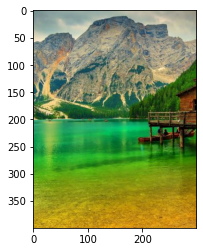

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

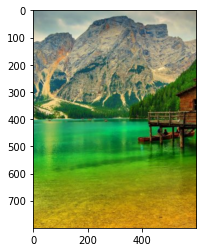

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

## Linear Regression

In [ ]:
# dataset
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

file_path = '/content/advertising.csv'
data = genfromtxt(file_path, delimiter=',', skip_header=1)

N = data.shape[0]
X = data[:,:3] #Indexing and Slicing bắt đầu từ cột đầu kết thúc 
y = data[:,3]

# khi các feature có các range giá trị khác nhau
# chúng ta cần normalize các feature để đưa về cùng range
maxi = np.max(X)
print(maxi)
mini = np.min(X)
print(mini)
avg = np.mean(X)
print(avg)
X = (X-avg) / (maxi-mini)

print(X)

In [ ]:
N = data.shape[0] #Data có 200 samples (rows) [0]: là dòng [1]: là cột
N

200

In [ ]:
y = data[:,3] #y là giá trị thực tế
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [ ]:
y[0]

22.1

In [ ]:
def f(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

def compute_loss(y, yhat):
    return (yhat - y)**2

def compute_gradient(y, yhat, var=None):
    if var:
        grad = 2*var*(yhat-y)
    else:
        grad = 2*(yhat-y)
    return grad
        

In [ ]:
def implement_linear_regression(X, y, epoch_max = 50, eta = 0.01):
    ########## Các bạn code tại đây ################
    # khởi tạo giá trị tham số
    w1 = np.random.randn()
    w2 = np.random.randn()
    w3 = np.random.randn()
    b = np.random.randn()

    losses = []

    for epoch in range(epoch_max):
        for i in range(N):
            # lấy ngẫu nhiên 1 sample
            print(i)
            x1, x2, x3 = X[i]
            yi = y[i]

            # tính output 
            yhati = f(x1, x2, x3, w1, w2, w3, b)
            print(yhati)

            # tính loss li
            li = compute_loss(yi, yhati)

            # tính gradient w1, w2, w3, b
            dli_dw1 = compute_gradient( yi, yhati, var=x1)
            dli_dw2 = compute_gradient( yi, yhati, var=x2)
            dli_dw3 = compute_gradient( yi, yhati, var=x3)
            dli_db  = compute_gradient( yi, yhati)


            # update giá trị theta
            w1 = w1 - eta*dli_dw1
            w2 = w2 - eta*dli_dw2
            w3 = w3 - eta*dli_dw3
            b  = b - eta*dli_db

            # logging
            losses.append(li)    
    return (w1, w2, w3, b), losses
    ###############################################

In [ ]:
X[1:10]

array([[-0.07575405, -0.09329791, -0.07372976],
       [-0.16785931, -0.0710307 ,  0.00791667],
       [ 0.2852446 , -0.08655027, -0.02852058],
       [ 0.3840975 , -0.18945175, -0.02885796],
       [-0.19653677, -0.06090924,  0.02714744],
       [-0.0318944 , -0.11522773, -0.14660425],
       [ 0.17964406, -0.15976215, -0.1867527 ],
       [-0.19687416, -0.21880398, -0.22251518],
       [ 0.44820007, -0.21711707, -0.15436404]])

In [ ]:
parameters, losses = implement_linear_regression(X, y, epoch_max = 50, eta = 0.001)

In [ ]:
# in loss cho 700 sample đầu
print(parameters)
print(losses)
x_axis = list(range(700))
plt.plot(x_axis, losses[:700], color="g")
plt.show()